<center>
    <h1> INF393 - Máquinas de Aprendizaje  </h1>
    <h2> Tarea 3 </h2>
    <h3> Universidad Técnica Federico Santa Maria </h3>
    
</center>

_Diciembre 2017_
<p>Profesor: R. Ñanculef</p>
 <p>Ayudante: Francisco Mena</p>
 <p>Integrantes: 
 <br>Alfredo Silva,
 201373511-8</br>
 <br>Fernando Llorens, 201373528-2</br>
 

 
</p>

<h1>4. Reconocimiento de Imágenes Sign Gestures</h1>
<p>
MNIST es un dataset muy popular de dígitos escrito a mano que a servido para probar distintos algoritmos
de Machine Learning relacionados con Computer Vision. Buscando nuevos desafíos, investigadores generaron
un dataset que podría usarse eventualmente en aplicaciones reales, Sign Gestures, consta de imagenes del
lenguaje de señas, estas tienen una resolución de 28x28 pixeles representados en una escala de grises 0-255.
La versión utilizada se atribuye a y viene separada en 27455 ejemplos de entrenamiento y 7172 casos de
pruebas. Las clases son mutualmente excluyentes y corresponden a las letras del alfabeto (imagen en PDF original).
</p>
<p>
(a) Construya una función que cargue todos los datos de entrenamiento y pruebas del problema generando
como salida: (i) dos matrices $X_{tr}$, $Y_{tr}$, correspondientes a las imágenes y etiquetas de entrenamiento,
(ii) dos matrices $X_t$, $Y_t$, correspondientes a las imágenes y etiquetas de pruebas, y finalmente (iii) dos
matrices $X_v$, $Y_v$, correspondientes a imágenes y etiquetas que se usarán como conjunto de validación, es
decir para tomar decisiones de diseño acerca del modelo. Este último conjunto debe ser extraído desde
el conjunto de entrenamiento original y no debe superar las 7000 imágenes.
</p>

In [1]:
#Si validacion no puede superar 7000 imagenes entonces no puede ser mas del 25% del entrenamiento,
#para asegurarnos usaremos el 20

import pandas as pd
from sklearn.model_selection import train_test_split
import collections
def load_data():
    train = pd.read_csv('sign_mnist_train.csv')
    test = pd.read_csv('sign_mnist_test.csv')
    print("TRAIN+VALIDACION-----------------------------")
    train.shape
    train.info()
    train.describe()
    print("TEST-----------------------------------------")
    test.shape
    test.info()
    test.describe()
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    x_train, x_v, y_train, y_v = train_test_split(x_tr, y_tr, test_size=0.20, random_state=42)
    y_t = test['label']
    x_t = test.iloc[:,1:]
    return(x_train,x_v,x_t,y_train,y_v,y_t)
def contar(y):
    counter=collections.Counter(y)
    for i in range(len(counter.values())):
        print("{} = {}".format(counter.keys()[i],
                                 counter.values()[i]))
x_tr, x_v, x_t, y_tr, y_v , y_t = load_data()

TRAIN+VALIDACION-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
TEST-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [2]:
x_tr.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
22706,97,65,128,44,17,67,64,66,69,72,...,189,180,134,97,76,86,94,90,91,91
1231,215,216,217,223,206,176,176,191,106,122,...,133,133,132,132,134,124,167,124,23,140
531,144,145,146,147,150,150,151,151,151,150,...,78,107,183,187,171,160,131,134,101,72
21099,64,73,83,96,101,108,111,115,118,122,...,163,167,169,169,170,173,173,175,175,176
17752,83,88,57,75,101,37,17,63,69,74,...,87,71,52,95,183,176,180,182,184,186


In [16]:
y_tr.shape
#y_tr.info()
y_tr.describe()

count    21964.000000
mean        12.324121
std          7.298931
min          0.000000
25%          6.000000
50%         13.000000
75%         19.000000
max         24.000000
Name: label, dtype: float64

In [14]:
y_tr.head()

22706    10
1231     15
531       0
21099    10
17752    22
Name: label, dtype: int64

<p>
(b) Construya una función que escale apropiadamente las imágenes antes de trabajar. Experimente sólo
escalando los datos de acuerdo a la intensidad máxima de pixel (i.e., dividiendo por 255) y luego
centrando y escalándolos como en actividades anteriores.
</p>

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
"""
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)
"""
def escalador(x_tr, x_v, x_t,n=255.0):
    #Se regula la intensidad de todos por igual
    x_tr = np.divide(x_tr, float(n))
    x_v = np.divide(x_v, float(n))
    x_t = np.divide(x_t, float(n))
    #Se centran y escalan todos los datos usando como referencia el de entrenamiento
    #de la misma manera que en el entregable anterior
    std = StandardScaler(with_mean=True, with_std=True)
    std.fit(x_tr)
    X_train = std.transform(x_tr)
    X_val = std.transform(x_v)
    X_test = std.transform(x_t)
    
    return(X_train, X_val, X_test)
Sx_tr,Sx_v,Sx_t = escalador(x_tr,x_v,x_t)#con n 255 por defecto
print(Sx_tr[:10,:10])

[[-1.1761998  -2.09806037 -0.60012897 -2.85449181 -3.76039244 -2.53284031
  -2.7583446  -2.86682037 -2.90983062 -2.99411405]
 [ 1.67937834  1.68848848  1.68209134  1.8015662   1.33950431  0.48377907
   0.44027188  0.8488636  -1.77696957 -1.39475919]
 [-0.03880851 -0.09194177 -0.13855632 -0.17530759 -0.17157621 -0.23578152
  -0.27370501 -0.34015527 -0.39916559 -0.49912047]
 [-1.97479369 -1.89744851 -1.75406059 -1.50189395 -1.49377166 -1.39814862
  -1.41606804 -1.41027225 -1.40955517 -1.39475919]
 [-1.51499721 -1.52130128 -2.42077663 -2.0481354  -1.49377166 -3.36310253
  -4.10062115 -2.95599679 -2.90983062 -2.93013986]
 [ 0.73558556  0.68542918  0.65637435  0.60503733  0.55698047  0.45610366
   0.4117128   0.40298152  0.39689894  0.33254406]
 [ 0.20318964  0.28420546  0.32301633  0.31891086  0.34111182  0.34540203
   0.38315373  0.40298152  0.39689894  0.42850535]
 [ 0.56618686  0.56004677  0.52815973  0.50099134  0.44904614  0.40075285
   0.38315373  0.34353058  0.33566321  0.30055696]


<p>
(c) Diseñe, entrene y evalúe una red neuronal para el problema partir de la representación original de las
imágenes. Experimente con distintas arquitecturas, pre-procesamientos y métodos de entrenamiento,
midiendo el error de clasificación sobre el conjunto de validación. En base a esta última medida de
desempeño, decida qué modelo, de entre todos los evaluados, medirá finalmente en el conjunto de test.
Reporte y discuta los resultados obtenidos. Se espera que logre obtener un error de pruebas menor o
igual a 0.2.
</p>

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data sin pre-procesar
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr.values, to_categorical(y_tr), nb_epoch=100, batch_size=128, verbose=1,
                        validation_data=(x_v.values,to_categorical(y_v)))



C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/100
21964/21964 [==============================] - 1s 64us/step - loss: 15.3576 - acc: 0.0409 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 2/100
21964/21964 [==============================] - 1s 50us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 3/100
21964/21964 [==============================] - 1s 50us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 4/100
21964/21964 [==============================] - 1s 52us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 5/100
21964/21964 [==============================] - 1s 49us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 6/100
21964/21964 [==============================] - 1s 50us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 7/100
21964/21964 [==============================] - 1s 48us/step - loss: 15.4496 - acc: 0.0415 - val_los

Epoch 59/100
21964/21964 [==============================] - 1s 49us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 60/100
21964/21964 [==============================] - 1s 49us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 61/100
21964/21964 [==============================] - 1s 49us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 62/100
21964/21964 [==============================] - 1s 48us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 63/100
21964/21964 [==============================] - 1s 52us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 64/100
21964/21964 [==============================] - 1s 54us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 65/100
21964/21964 [==============================] - 1s 50us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 66/100


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data sin pre-procesar con una capa menos y  epoch a la mitad
model1 = Sequential()
model1.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model1.add(Dense(25, init='uniform', activation='softmax'))
model1.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(x_tr.values, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1,
                        validation_data=(x_v.values,to_categorical(y_v)))

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 1s 68us/step - loss: 15.5046 - acc: 0.0373 - val_loss: 15.5663 - val_acc: 0.0342
Epoch 2/50
21964/21964 [==============================] - 1s 48us/step - loss: 15.5149 - acc: 0.0374 - val_loss: 15.5663 - val_acc: 0.0342
Epoch 3/50
21964/21964 [==============================] - 1s 49us/step - loss: 15.5149 - acc: 0.0374 - val_loss: 15.5663 - val_acc: 0.0342
Epoch 4/50
21964/21964 [==============================] - 1s 48us/step - loss: 15.5149 - acc: 0.0374 - val_loss: 15.5663 - val_acc: 0.0342
Epoch 5/50
21964/21964 [==============================] - 1s 48us/step - loss: 15.5149 - acc: 0.0374 - val_loss: 15.5663 - val_acc: 0.0342
Epoch 6/50
21964/21964 [==============================] - 1s 49us/step - loss: 15.5149 - acc: 0.0374 - val_loss: 15.5663 - val_acc: 0.0342
Epoch 7/50
21964/21964 [==============================] - 1s 53us/step - loss: 15.5149 - acc: 0.0374 - val_loss: 15.5

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data sin pre-procesar una capa extra con tanh- ahora se usa elu por relu
model2 = Sequential()
model2.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model2.add(Dense(30, init='uniform', activation='elu'))
model2.add(Dense(30, init='uniform', activation='tanh'))
model2.add(Dense(25, init='uniform', activation='softmax'))
model2.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_tr.values, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1,
                        validation_data=(x_v.values,to_categorical(y_v)))

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="elu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="tanh", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been rename

Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 2s 70us/step - loss: 3.1546 - acc: 0.0695 - val_loss: 3.1914 - val_acc: 0.0475
Epoch 2/50
21964/21964 [==============================] - 1s 53us/step - loss: 3.1622 - acc: 0.0526 - val_loss: 3.1729 - val_acc: 0.0514
Epoch 3/50
21964/21964 [==============================] - 1s 52us/step - loss: 3.0047 - acc: 0.0953 - val_loss: 2.7607 - val_acc: 0.1218
Epoch 4/50
21964/21964 [==============================] - 1s 52us/step - loss: 2.8467 - acc: 0.1217 - val_loss: 2.6315 - val_acc: 0.1537
Epoch 5/50
21964/21964 [==============================] - 1s 52us/step - loss: 2.7190 - acc: 0.1436 - val_loss: 2.9165 - val_acc: 0.1076
Epoch 6/50
21964/21964 [==============================] - 1s 52us/step - loss: 2.6474 - acc: 0.1572 - val_loss: 2.6558 - val_acc: 0.1382
Epoch 7/50
21964/21964 [==============================] - 1s 53us/step - loss: 2.6351 - acc: 0.1599 - val_loss: 2.6570 - val_acc:

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data pre-procesada una capa extra con tanh-
model3 = Sequential()
model3.add(Dense(30, input_dim=Sx_tr.shape[1], init='uniform', activation='relu'))
model3.add(Dense(30, init='uniform', activation='relu'))
model3.add(Dense(30, init='uniform', activation='tanh'))
model3.add(Dense(25, init='uniform', activation='softmax'))
model3.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(Sx_tr, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1,
                    validation_data=(Sx_v,to_categorical(y_v)))

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="tanh", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renam

Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 2s 78us/step - loss: 3.2123 - acc: 0.0502 - val_loss: 3.2064 - val_acc: 0.0479
Epoch 2/50
21964/21964 [==============================] - 1s 50us/step - loss: 3.2027 - acc: 0.0471 - val_loss: 3.1989 - val_acc: 0.0486
Epoch 3/50
21964/21964 [==============================] - 1s 50us/step - loss: 3.1962 - acc: 0.0492 - val_loss: 3.1930 - val_acc: 0.0586
Epoch 4/50
21964/21964 [==============================] - 1s 50us/step - loss: 3.1880 - acc: 0.0601 - val_loss: 3.1777 - val_acc: 0.0688
Epoch 5/50
21964/21964 [==============================] - 1s 51us/step - loss: 3.1452 - acc: 0.0621 - val_loss: 3.1127 - val_acc: 0.0639
Epoch 6/50
21964/21964 [==============================] - 1s 51us/step - loss: 3.0648 - acc: 0.0891 - val_loss: 3.0004 - val_acc: 0.0894
Epoch 7/50
21964/21964 [==============================] - 1s 51us/step - loss: 2.8548 - acc: 0.1054 - val_loss: 2.7215 - val_acc:

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data pre-procesada una capa menos a la anterior y una capa ahora usa elu en vez de relu
model4 = Sequential()
model4.add(Dense(30, input_dim=Sx_tr.shape[1], init='uniform', activation='relu'))
model4.add(Dense(30, init='uniform', activation='elu'))
model4.add(Dense(25, init='uniform', activation='softmax'))
model4.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model4.fit(Sx_tr, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1,
                    validation_data=(Sx_v,to_categorical(y_v)))

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="elu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 2s 74us/step - loss: 3.1812 - acc: 0.1058 - val_loss: 3.0777 - val_acc: 0.1109
Epoch 2/50
21964/21964 [==============================] - 1s 53us/step - loss: 2.6966 - acc: 0.1799 - val_loss: 2.2330 - val_acc: 0.2879
Epoch 3/50
21964/21964 [==============================] - 1s 52us/step - loss: 1.8607 - acc: 0.3869 - val_loss: 1.5684 - val_acc: 0.4821
Epoch 4/50
21964/21964 [==============================] - 1s 53us/step - loss: 1.3030 - acc: 0.5651 - val_loss: 1.1099 - val_acc: 0.6217
Epoch 5/50
21964/21964 [==============================] - 1s 52us/step - loss: 0.9110 - acc: 0.6908 - val_loss: 0.7767 - val_acc: 0.7385
Epoch 6/50
21964/21964 [==============================] - 1s 54us/step - loss: 0.6429 - acc: 0.7971 - val_loss: 0.5532 - val_acc: 0.8312
Epoch 7/50
21964/21964 [==============================] - 1s 52us/step - loss: 0.4528 - acc: 0.8669 - val_loss: 0.4136 - val_acc:

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data pre-procesada capa inicial con activacion lineal
########Con LINEAL al final no aprende :O####################
model5 = Sequential()
model5.add(Dense(30, input_dim=Sx_tr.shape[1], init='uniform', activation='linear'))
model5.add(Dense(30, init='uniform', activation='elu'))
model5.add(Dense(25, init='uniform', activation='softmax'))
model5.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model5.fit(Sx_tr, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1,
                    validation_data=(Sx_v,to_categorical(y_v)))

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="linear", kernel_initializer="uniform")`
  import sys
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="elu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 2s 74us/step - loss: 2.9809 - acc: 0.1403 - val_loss: 2.5406 - val_acc: 0.2001
Epoch 2/50
21964/21964 [==============================] - 1s 55us/step - loss: 2.0246 - acc: 0.3442 - val_loss: 1.6692 - val_acc: 0.4409
Epoch 3/50
21964/21964 [==============================] - 1s 53us/step - loss: 1.4119 - acc: 0.5270 - val_loss: 1.2359 - val_acc: 0.5830
Epoch 4/50
21964/21964 [==============================] - 1s 54us/step - loss: 1.0372 - acc: 0.6475 - val_loss: 0.9296 - val_acc: 0.6724
Epoch 5/50
21964/21964 [==============================] - 1s 54us/step - loss: 0.7752 - acc: 0.7468 - val_loss: 0.6941 - val_acc: 0.7705
Epoch 6/50
21964/21964 [==============================] - 1s 57us/step - loss: 0.5764 - acc: 0.8217 - val_loss: 0.5204 - val_acc: 0.8403
Epoch 7/50
21964/21964 [==============================] - 1s 54us/step - loss: 0.4240 - acc: 0.8776 - val_loss: 0.3819 - val_acc:

In [21]:
S2x_tr,S2x_v,S2x_t = escalador(x_tr,x_v,x_t,n=100.0)#con n 100, no tiene mucha diferencia con hacer n 255
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data pre-procesada una capa menos a la anterior y una capa ahora usa elu en vez de relu
model6 = Sequential()
model6.add(Dense(30, input_dim=S2x_tr.shape[1], init='uniform', activation='relu'))
model6.add(Dense(30, init='uniform', activation='elu'))
model6.add(Dense(25, init='uniform', activation='softmax'))
model6.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model6.fit(S2x_tr, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1,
                    validation_data=(S2x_v,to_categorical(y_v)))

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="elu", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 2s 74us/step - loss: 3.1829 - acc: 0.1035 - val_loss: 3.0938 - val_acc: 0.1457
Epoch 2/50
21964/21964 [==============================] - 1s 57us/step - loss: 2.7606 - acc: 0.1698 - val_loss: 2.2827 - val_acc: 0.2657
Epoch 3/50
21964/21964 [==============================] - 1s 53us/step - loss: 1.8727 - acc: 0.3763 - val_loss: 1.5796 - val_acc: 0.4626
Epoch 4/50
21964/21964 [==============================] - 1s 52us/step - loss: 1.2998 - acc: 0.5705 - val_loss: 1.0871 - val_acc: 0.6323
Epoch 5/50
21964/21964 [==============================] - 1s 53us/step - loss: 0.8860 - acc: 0.7166 - val_loss: 0.7680 - val_acc: 0.7514
Epoch 6/50
21964/21964 [==============================] - 1s 55us/step - loss: 0.6157 - acc: 0.8134 - val_loss: 0.5432 - val_acc: 0.8419
Epoch 7/50
21964/21964 [==============================] - 1s 53us/step - loss: 0.4245 - acc: 0.8905 - val_loss: 0.3831 - val_acc:

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data pre-procesada capa inicial con activacion lineal con loss categorical_hinge no supero 0,49 
model7 = Sequential()
model7.add(Dense(30, input_dim=Sx_tr.shape[1], init='uniform', activation='relu'))
model7.add(Dense(30, init='uniform', activation='elu'))
model7.add(Dense(25, init='uniform', activation='softmax'))
model7.compile(optimizer=SGD(lr=0.05), loss='categorical_hinge', metrics=['accuracy'])
model7.fit(Sx_tr, to_categorical(y_tr), nb_epoch=150, batch_size=128, verbose=1,
                    validation_data=(Sx_v,to_categorical(y_v)))

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="elu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/150
21964/21964 [==============================] - 2s 78us/step - loss: 1.0008 - acc: 0.0342 - val_loss: 1.0007 - val_acc: 0.0412
Epoch 2/150
21964/21964 [==============================] - 1s 50us/step - loss: 1.0007 - acc: 0.0387 - val_loss: 1.0006 - val_acc: 0.0450
Epoch 3/150
21964/21964 [==============================] - 1s 51us/step - loss: 1.0006 - acc: 0.0481 - val_loss: 1.0005 - val_acc: 0.0534
Epoch 4/150
21964/21964 [==============================] - 1s 59us/step - loss: 1.0005 - acc: 0.0577 - val_loss: 1.0005 - val_acc: 0.0634
Epoch 5/150
21964/21964 [==============================] - 1s 51us/step - loss: 1.0004 - acc: 0.0690 - val_loss: 1.0004 - val_acc: 0.0745
Epoch 6/150
21964/21964 [==============================] - 1s 49us/step - loss: 1.0004 - acc: 0.0821 - val_loss: 1.0004 - val_acc: 0.0887
Epoch 7/150
21964/21964 [==============================] - 1s 51us/step - loss: 1.0004 - acc: 0.0963 - val_loss: 1.0003 - v

Epoch 118/150
21964/21964 [==============================] - 1s 59us/step - loss: 0.9574 - acc: 0.4973 - val_loss: 0.9595 - val_acc: 0.4826
Epoch 119/150
21964/21964 [==============================] - 1s 59us/step - loss: 0.9573 - acc: 0.4943 - val_loss: 0.9594 - val_acc: 0.4872
Epoch 120/150
21964/21964 [==============================] - 1s 58us/step - loss: 0.9572 - acc: 0.4946 - val_loss: 0.9593 - val_acc: 0.4830
Epoch 121/150
21964/21964 [==============================] - 1s 58us/step - loss: 0.9571 - acc: 0.4939 - val_loss: 0.9592 - val_acc: 0.4817
Epoch 122/150
21964/21964 [==============================] - 1s 60us/step - loss: 0.9569 - acc: 0.4935 - val_loss: 0.9590 - val_acc: 0.4764
Epoch 123/150
21964/21964 [==============================] - 1s 58us/step - loss: 0.9567 - acc: 0.4921 - val_loss: 0.9587 - val_acc: 0.4762
Epoch 124/150
21964/21964 [==============================] - 1s 57us/step - loss: 0.9563 - acc: 0.4871 - val_loss: 0.9583 - val_acc: 0.4679
Epoch 125/150
21964/

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical
#Con la data pre-procesada una capa
#rprop is equivalent to using the gradient but also dividing by the size of the gradient.
"""
– The problem with mini-batch rprop is that we divide by a different number 
for each mini-batch. So why not force the number we divide by to be very 
similar for adjacent mini-batches?
rmsprop: Keep a moving average of the squared gradient for each weight"""
model8 = Sequential()
model8.add(Dense(30, input_dim=Sx_tr.shape[1], init='uniform', activation='relu'))
model8.add(Dense(28, init='uniform', activation='elu'))
model8.add(Dense(25, init='uniform', activation='softmax'))
model8.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model8.fit(Sx_tr, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1,
                validation_data=(Sx_v,to_categorical(y_v)))

###NOS QUEDAMOS CON ESTA, logró val_acc 1 de manera consistente

Using TensorFlow backend.
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(28, activation="elu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 2s 69us/step - loss: 2.0612 - acc: 0.3532 - val_loss: 1.3961 - val_acc: 0.5223
Epoch 2/50
21964/21964 [==============================] - 1s 59us/step - loss: 1.0195 - acc: 0.6592 - val_loss: 0.7688 - val_acc: 0.7560
Epoch 3/50
21964/21964 [==============================] - 1s 58us/step - loss: 0.5633 - acc: 0.8280 - val_loss: 0.4481 - val_acc: 0.8656
Epoch 4/50
21964/21964 [==============================] - 1s 53us/step - loss: 0.2966 - acc: 0.9249 - val_loss: 0.2124 - val_acc: 0.9577
Epoch 5/50
21964/21964 [==============================] - 1s 53us/step - loss: 0.1349 - acc: 0.9757 - val_loss: 0.0883 - val_acc: 0.9865
Epoch 6/50
21964/21964 [==============================] - 1s 53us/step - loss: 0.0538 - acc: 0.9943 - val_loss: 0.0479 - val_acc: 0.9920
Epoch 7/50
21964/21964 [==============================] - 1s 52us/step - loss: 0.0206 - acc: 0.9990 - val_loss: 0.0124 - val_acc:

In [4]:
#predicciones = model8.predict(Sx_t)
model8.evaluate(Sx_t, to_categorical(y_t), batch_size=128, verbose=1, sample_weight=None)


7172/7172 [==============================] - 0s 31us/step


[2.7175697840231314, 0.75669269380925819]

Se entrenaron 8 modelos diferentes de capas, cambiando no solo la cantidad de neuronas en algunos casos, sino también la catidad de capas, se probó con multiples funciones de activación distintas, con distintos optimizadores y funciones de perdida.

El ultimo modelo, que fue el con mejor comportamiento en validación, utilizo un optimizador RMSprop, 3 capas con funciones de activación: relu, elu y softmax, en ese orden; con una función de loss cross-entropy y 50 epoch, además de utilizar la data pre-procesada. Como se puede ver logro un error del ~0,25 en test que es un poco más del 0,2 que se pedía.

Se pueden destacar los siguientes resultados extra entre las pruebas:

1-Si se utiliza loss categorical-hinge la red no puede aprender de buena manera, y jamás pasa del ~60% de accuracy.

2-RMSprop converge mucho más rápido a una accuracy muy buena, trabaja en teoría de manera similar a SGD, pero utiliza el tamaño de cada batch sobre el gradiente encontrado, para converger en menor tiempo a una solución local más óptima. De todas maneras se debe tener cuidado de no encerrarse demaciado en una solución ótima local que no es cercana a la mejor global.

3-En contra de lo que uno pensaría una función lineal dentro de las primeras capas ayuda mucho a distingir las clases.

4-Si se usa una función Sigmoidea en las capas intermedias la red no puede entrenarse, porque no puede realizar backward propagation de buena manera después de esa capa.

5-Si se pone una función lineal en la última capa no puede categorizar, lo que hace mucho sentido (no es regresión es categorización).

6-Para este ejercicio no es notorio si se divide por 255 los pixeles, que si se dividen por 100.

7-Los datos sin procesar no sirven para entrenar las redes, no pueden aprender de ellos.

<p>(d) Para la mejor red entrenada anteriormente construya la matriz de confusión de las distintas clases, para
asi visualizar cuáles son las clases más difíciles de clasificar y con cuáles se confunden. Comente.
</p>

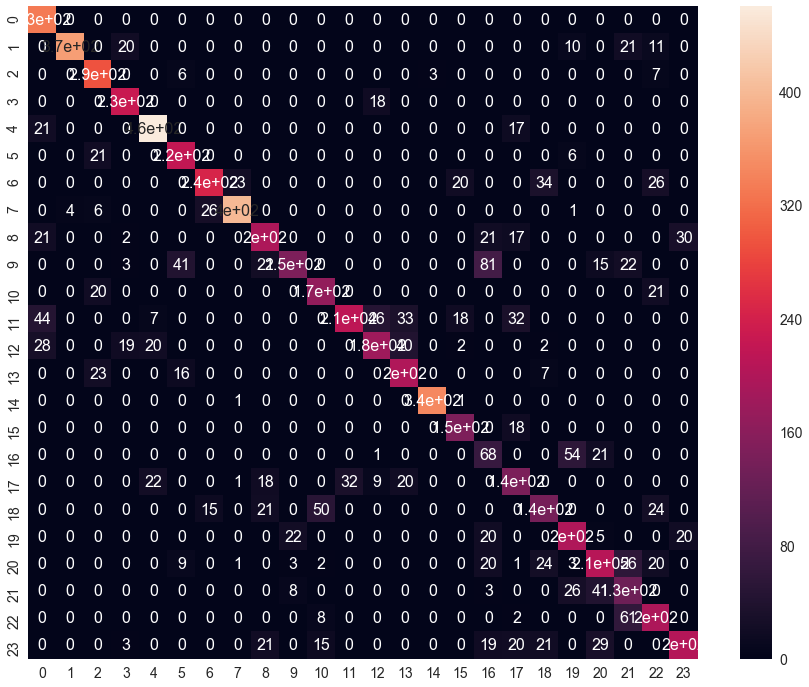

In [18]:
from sklearn.metrics import confusion_matrix
y_pred = model8.predict(Sx_t)
pred =[]
for fila in y_pred:
    pred.append(np.argmax(fila))
A = confusion_matrix(y_t, pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = A
df_cm = pd.DataFrame(array, index = [i for i in range(len(A[0]))],
                  columns = [i for i in  range(len(A[0]))])
plt.figure(figsize = (15,12))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show()

En general la clase 16 es difícil de dicernir de las demás, con la que más tiene confusión es con la clase 9

La clase 23 también suele confundirse bastante, de resto el hitmap muestra buenos resultados en al diagonal, con errores pequeños dispersados en la matriz.

<p>
(e) Entrene una SVM no lineal sobre los pixeles con y sin pre-procesamiento. Puede utilizar el conjunto de
validación para seleccionar hiper-parámetros, como el nivel de regularización aplicado y/o la función
de kernel a utilizar.
</p>

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
Cs = [0.0001,0.01,0.1,1,10,100,1000]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernel:
    print (\"-\"*80)
    for c in Cs:
        clf = SVC(C=c,kernel=k)
        clf.fit(x_tr,y_tr)
        predTest1 = clf.predict(x_v)
        acc1 = accuracy_score(predTest1,y_v)
        print (\"Score Validación sin Pre-Procesamiento %f\"%acc1, \", C: \", c , \"Kernel: \", k)
    
    for k in kernel:
        print (\"-\"*80)
        for c in Cs:
            clf2 = SVC (C=c,kernel=k)
            clf2.fit(Sx_tr,y_tr)
            predTest2 = clf2.predict(Sx_v)
            acc2 = accuracy_score(predTest2,y_v)
            print (\"Score Validación Pre-Procesamiento: %f\"%acc2, \", C: \", c , \"Kernel: \", k)
    

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

RESULTADOS:

"Score Validación sin Pre-Procesamiento 1.000000 , C:  0.0001 Kernel:  linear\n"

"Score Validación sin Pre-Procesamiento 1.000000 , C:  0.01 Kernel:  linear\n"
      
"Score Validación sin Pre-Procesamiento 1.000000 , C:  0.1 Kernel:  linear\n"
      
"Score Validación sin Pre-Procesamiento 1.000000 , C:  1 Kernel:  linear\n"

"Score Validación sin Pre-Procesamiento 1.000000 , C:  10 Kernel:  linear\n"

"Score Validación sin Pre-Procesamiento 1.000000 , C:  100 Kernel:  linear\n"

"Score Validación sin Pre-Procesamiento 1.000000 , C:  1000 Kernel:  linear\n"
      
-------------------------------------------------------------      
      
"Score Validación sin Pre-Procesamiento 1.000000 , C:  0.0001 Kernel:  poly\n"

"Score Validación sin Pre-Procesamiento 1.000000 , C:  0.01 Kernel:  poly\n"

"Score Validación sin Pre-Procesamiento 1.000000 , C:  0.1 Kernel:  poly\n"

"Score Validación sin Pre-Procesamiento 1.000000 , C:  1 Kernel:  poly\n"

"Score Validación sin Pre-Procesamiento 1.000000 , C:  10 Kernel:  poly\n"

"Score Validación sin Pre-Procesamiento 1.000000 , C:  100 Kernel:  poly\n"

"Score Validación sin Pre-Procesamiento 1.000000 , C:  1000 Kernel:  poly\n"

--------------------------------------------------------------

"Score Validación sin Pre-Procesamiento 0.047532 , C:  0.0001 Kernel:  rbf\n"

"Score Validación sin Pre-Procesamiento 0.047532 , C:  0.01 Kernel:  rbf\n"

"Score Validación sin Pre-Procesamiento 0.047532 , C:  0.1 Kernel:  rbf\n"

"Score Validación sin Pre-Procesamiento 0.226553 , C:  1 Kernel:  rbf\n"

"Score Validación sin Pre-Procesamiento 0.249135 , C:  10 Kernel:  rbf\n"

"Score Validación sin Pre-Procesamiento 0.249135 , C:  100 Kernel:  rbf\n"

"Score Validación sin Pre-Procesamiento 0.249135 , C:  1000 Kernel:  rbf\n"
      
-------------------------------------------------------------


"Score Validación sin Pre-Procesamiento 0.047532 , C:  0.0001 Kernel:  sigmoid\n"

"Score Validación sin Pre-Procesamiento 0.047532 , C:  0.01 Kernel:  sigmoid\n"

"Score Validación sin Pre-Procesamiento 0.047532 , C:  0.1 Kernel:  sigmoid\n"

"Score Validación sin Pre-Procesamiento 0.047532 , C:  1 Kernel:  sigmoid\n"

"Score Validación sin Pre-Procesamiento 0.047532 , C:  10 Kernel:  sigmoid\n"

"Score Validación sin Pre-Procesamiento 0.047532 , C:  100 Kernel:  sigmoid\n"

"Score Validación sin Pre-Procesamiento 0.047532 , C:  1000 Kernel:  sigmoid\n"

---------------------------------------------------------------
      
      
"Score Validación Pre-Procesamiento: 0.826443 , C:  0.0001 Kernel:  linear\n"

"Score Validación Pre-Procesamiento: 1.000000 , C:  0.01 Kernel:  linear\n"

"Score Validación Pre-Procesamiento: 1.000000 , C:  0.1 Kernel:  linear\n"

"Score Validación Pre-Procesamiento: 1.000000 , C:  1 Kernel:  linear\n"

"Score Validación Pre-Procesamiento: 1.000000 , C:  10 Kernel:  linear\n"

"Score Validación Pre-Procesamiento: 1.000000 , C:  100 Kernel:  linear\n"

"Score Validación Pre-Procesamiento: 1.000000 , C:  1000 Kernel:  linear\n"

-------------------------------------------------------------
      
"Score Validación Pre-Procesamiento: 0.047714 , C:  0.0001 Kernel:  poly\n"

"Score Validación Pre-Procesamiento: 0.249499 , C:  0.01 Kernel:  poly\n"

"Score Validación Pre-Procesamiento: 0.685485 , C:  0.1 Kernel:  poly\n"

"Score Validación Pre-Procesamiento: 0.976689 , C:  1 Kernel:  poly\n"

"Score Validación Pre-Procesamiento: 0.998725 , C:  10 Kernel:  poly\n"

"Score Validación Pre-Procesamiento: 0.998543 , C:  100 Kernel:  poly\n"

"Score Validación Pre-Procesamiento: 0.998543 , C:  1000 Kernel:  poly\n"

-------------------------------------------------------------


"Score Validación Pre-Procesamiento: 0.047532 , C:  0.0001 Kernel:  rbf\n"

"Score Validación Pre-Procesamiento: 0.346203 , C:  0.01 Kernel:  rbf\n"

"Score Validación Pre-Procesamiento: 0.909852 , C:  0.1 Kernel:  rbf\n"

"Score Validación Pre-Procesamiento: 0.999818 , C:  1 Kernel:  rbf\n"

"Score Validación Pre-Procesamiento: 0.999818 , C:  10 Kernel:  rbf\n"

"Score Validación Pre-Procesamiento: 0.999818 , C:  100 Kernel:  rbf\n"

"Score Validación Pre-Procesamiento: 0.999818 , C:  1000 Kernel:  rbf\n"

---------------------------------------------------------------
      
"Score Validación Pre-Procesamiento: 0.047532 , C:  0.0001 Kernel:  sigmoid\n"

"Score Validación Pre-Procesamiento: 0.383719 , C:  0.01 Kernel:  sigmoid\n"

"Score Validación Pre-Procesamiento: 0.505008 , C:  0.1 Kernel:  sigmoid\n"

"Score Validación Pre-Procesamiento: 0.421781 , C:  1 Kernel:  sigmoid\n"

"Score Validación Pre-Procesamiento: 0.365143 , C:  10 Kernel:  sigmoid\n"

"Score Validación Pre-Procesamiento: 0.363868 , C:  100 Kernel:  sigmoid\n"

"Score Validación Pre-Procesamiento: 0.364779 , C:  1000 Kernel:  sigmoid\n"


Con los datos procesador los kernel lineal, rbf y poly muestran buenos resultados.

<p>
(f) Entrene una árbol de clasificación sobre los pixeles con y sin pre-procesamiento. Puede utilizar el
conjunto de validación para seleccionar hiper-parámetros, como la profundidad máxima del árbol.
</p>

In [72]:
from sklearn.tree import DecisionTreeClassifier as DTC
arbol = DTC()
arbol.fit(x_tr,y_tr)

arbol2 = DTC()
arbol2.fit(Sx_tr,y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
predT1 = arbol.predict(x_v)
predT2 = arbol2.predict(Sx_v)


from sklearn.metrics import accuracy_score

errorT1 = accuracy_score(predT1,y_v)
print("Score Validacion de DTC Sin Pre-Proc: "+str(errorT1))

errorT2 = accuracy_score(predT2,y_v)
print("Score Validacion de DTC Con Pre-Proc: "+str(errorT2))

Score Validacion de DTC Sin Pre-Proc: 0.876160990712
Score Validacion de DTC Con Pre-Proc: 0.874157712621


In [74]:
predT1 = arbol.predict(x_t)
predT2 = arbol2.predict(Sx_t)


from sklearn.metrics import accuracy_score

errorT1 = accuracy_score(predT1,y_t)
print("Score de DTC Sin Pre-Proc: "+str(errorT1))

errorT2 = accuracy_score(predT2,y_t)
print("Score de DTC Con Pre-Proc: "+str(errorT2))

Score de DTC Sin Pre-Proc: 0.445203569437
Score de DTC Con Pre-Proc: 0.443809258226


Los resultados en validación no sugieren que los árboles tengan problemas para generalizar, tanto como si hubo pre-procesamiento como si no, pero estos resultados no se ven reflejados en el conjunto de testeo. Es desconcertante este resultado, porque hasta el momento con el resto de las máquinas no se habia sugerido que el conjunto de validación no fuera representante del conjunto de testeo, pero ahora si surge esa inquietud, de lo contrario es difícil encontrarle una razón a este comportamiento. 